In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.odr import ODR, Model, RealData

Defining functions

In [97]:
def linear_regression(x, y, err):
    s1 = np.sum(1/(err**2))
    sx = np.sum(x/(err**2))
    sy = np.sum(y/(err**2))
    sxx = np.sum(x**2/(err**2))
    sxy = np.sum(x*y/(err**2))

    d = s1*sxx-sx*sx
    v = np.array([[sxx, -sx], [-sx, s1]])/d

    a = (sy*sxx-sx*sxy)/d
    b = (s1*sxy-sx*sy)/d
    sig_a = np.sqrt(v[0][0])
    sig_b = np.sqrt(v[1][1])

    return (a, sig_a, b, sig_b, v)

In [98]:
def f(B, x):
    return B[1]*x + B[0]

Importing data

In [99]:
df = pd.read_csv('prova2.csv')

v = np.array(df['Tensione (V) per 0.14']).astype(float)
i = np.array(df['Corrente (mA) per 0.14']).astype(float)

di = np.array(df['errore i 0.14']).astype(float)
dv = np.array(df['errore v 0.14']).astype(float)

v2 = np.array(df['Tensione (V) per 0.07']).astype(float)
i2 = np.array(df['Corrente (mA) per 0.07']).astype(float)

di2 = np.array(df['errore i 0.07']).astype(float)
dv2 = np.array(df['errore v 0.07']).astype(float)

Fit caso V = 0.014

In [100]:
linear = Model(f)
mydata = RealData(i[:v.size-3],v[:v.size-3],sx=di[:v.size-3], sy=dv[:v.size-3])
myodr = ODR(mydata, linear, beta0=[1., 1.])
myoutput = myodr.run()
myoutput.pprint()

Beta: [-16.57115617   0.79859648]
Beta Std Error: [0.44518681 0.01916724]
Beta Covariance: [[ 1.98151919 -0.08520093]
 [-0.08520093  0.0036731 ]]
Residual Variance: 0.10001987378957163
Inverse Condition #: 0.0021204303990157727
Reason(s) for Halting:
  Sum of squares convergence


In [101]:
a,b = myoutput.beta
da,db = myoutput.sd_beta
cov = myoutput.cov_beta

/var/folders/bd/5ss8qyms4cd6_t67dg1pjhbw0000gn/T/ipykernel_71452/638583373.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(v, i, xerr= dv, yerr= di, fmt="o", label = 'data', marker = '.', markerfacecolor='white', markersize=10)


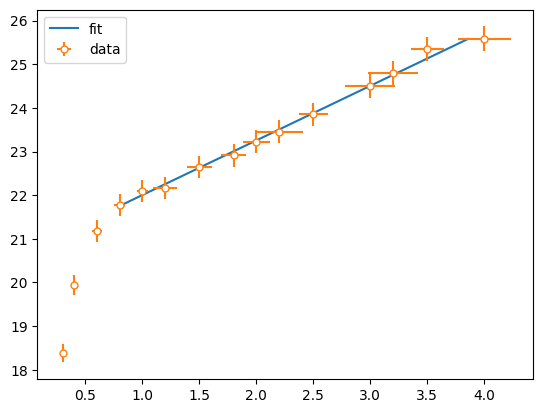

In [102]:
fig, ax = plt.subplots()
ax.plot(a+b*i[:v.size-3], i[:v.size-3], label = 'fit')
ax.errorbar(v, i, xerr= dv, yerr= di, fmt="o", label = 'data', marker = '.', markerfacecolor='white', markersize=10)
plt.legend()

Fit caso 0.07

In [103]:
linear = Model(f)
mydata = RealData(i2[:v2.size-3],v2[:v2.size-3],sx=di2[:v2.size-3], sy=dv2[:v2.size-3])
myodr = ODR(mydata, linear, beta0=[1., 1.])
myoutput = myodr.run()
myoutput.pprint()

Beta: [-23.43361775   1.76483384]
Beta Std Error: [0.79299477 0.05486423]
Beta Covariance: [[ 6.74500056 -0.46632758]
 [-0.46632758  0.03228642]]
Residual Variance: 0.0932306373779334
Inverse Condition #: 0.0024494314036375238
Reason(s) for Halting:
  Sum of squares convergence


In [104]:
a2,b2 = myoutput.beta
da2,db2 = myoutput.sd_beta
cov2 = myoutput.cov_beta

/var/folders/bd/5ss8qyms4cd6_t67dg1pjhbw0000gn/T/ipykernel_71452/3962653116.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(v2, i2, xerr=dv2 , yerr=di2, fmt="o", label = 'data', marker = '.', markerfacecolor='white', markersize=10)


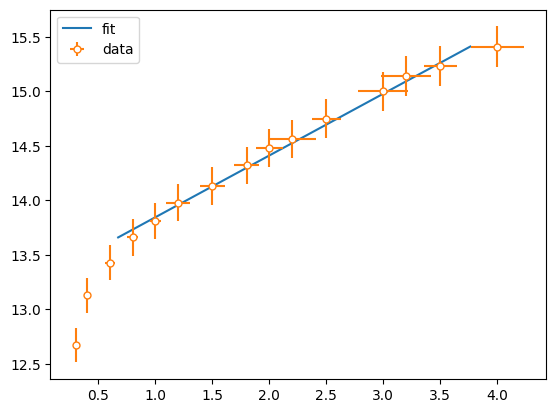

In [105]:
fig, ax = plt.subplots()
ax.plot(a2+b2*i2[:v2.size-3], i2[:v2.size-3], label = 'fit')
ax.errorbar(v2, i2, xerr=dv2 , yerr=di2, fmt="o", label = 'data', marker = '.', markerfacecolor='white', markersize=10)
plt.legend()

Parametri caso 0.14

In [ ]:
#calculating g:
g = 1/b
dg = db/(b**2) #d(g(b)) = |g'(b)|db = db/(b)^2

g2 = 1/b2
dg2 = db2/(b2**2)

#calculating beta: come si calcola beta???
